In [ ]:
import plotly.express as px 
import pandas as pd 
import numpy as np 
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import datetime
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
from sklearn import svm

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from __future__ import absolute_import,division,print_function,unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd


mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

print("Import Succesfull")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Import Succesfull


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Get some data
df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Onion/Onion_Cleaned.xlsx")

In [ ]:
df.head(10)

,Date,Bengaluru_WholesalePrice,Bengaluru_RetailPrice,Bengaluru_Volume,Avg_Temperature
0,2015-01-01,1758.0,2791.0,74978.0,20.1
1,2015-02-01,1815.0,2750.0,42164.0,22.8
2,2015-03-01,1576.0,2396.0,41339.0,27.1
3,2015-04-01,1455.0,2260.0,43534.0,31.2
4,2015-05-01,1725.0,2458.0,44227.0,33.4
5,2015-06-01,2182.0,3145.0,43403.0,32.6
6,2015-07-01,2357.0,3314.0,45957.0,29.4
7,2015-08-01,2727.0,4029.0,83437.0,28.1
8,2015-09-01,2536.0,4391.0,114533.0,28.6
9,2015-10-01,2223.0,3914.0,173788.0,28.4


In [ ]:
Ben = df

In [ ]:
Ben.head()

,Date,Bengaluru_WholesalePrice,Bengaluru_RetailPrice,Bengaluru_Volume,Avg_Temperature
0,2015-01-01,1758.0,2791.0,74978.0,20.1
1,2015-02-01,1815.0,2750.0,42164.0,22.8
2,2015-03-01,1576.0,2396.0,41339.0,27.1
3,2015-04-01,1455.0,2260.0,43534.0,31.2
4,2015-05-01,1725.0,2458.0,44227.0,33.4


In [ ]:
Ben.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      67 non-null     datetime64[ns]
 1   Bengaluru_WholesalePrice  67 non-null     float64       
 2   Bengaluru_RetailPrice     67 non-null     float64       
 3   Bengaluru_Volume          67 non-null     float64       
 4   Avg_Temperature           67 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.7 KB


In [ ]:
Ben.describe(include='all')

,Date,Bengaluru_WholesalePrice,Bengaluru_RetailPrice,Bengaluru_Volume,Avg_Temperature
count,67,67.000000,67.000000,67.000000,67.000000
unique,67,NaN,NaN,NaN,NaN
top,2016-05-01 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
first,2015-01-01 00:00:00,NaN,NaN,NaN,NaN
last,2020-07-01 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,1543.107692,2590.338462,54324.353846,27.352239
std,NaN,1135.276206,1597.341544,30058.007039,4.259512
min,NaN,491.000000,1035.000000,14927.000000,20.100000
25%,NaN,814.500000,1549.500000,40406.500000,23.650000


# EXPLORATORY DATA ANALYSIS

In [ ]:
print(Ben.shape)

(67, 5)


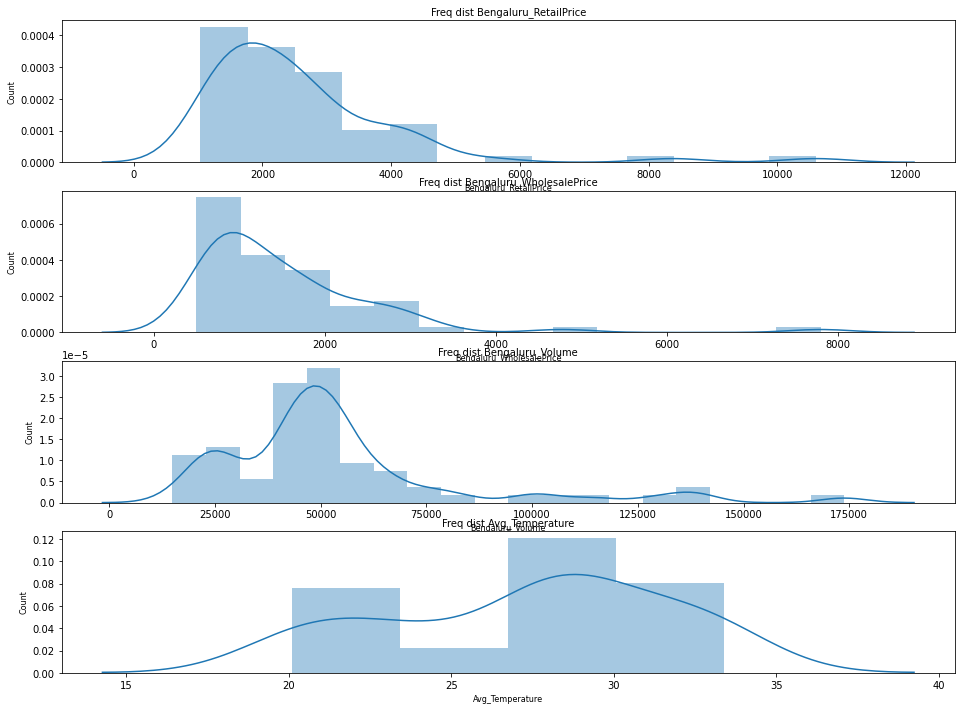

In [ ]:
columns=['Bengaluru_RetailPrice','Bengaluru_WholesalePrice','Bengaluru_Volume','Avg_Temperature']
fig,ax=plt.subplots(len(columns),figsize=(16,12))

for i, col_val in enumerate (columns):
  sns.distplot(Ben[col_val],hist=True, ax=ax[i])
  ax[i].set_title('Freq dist '+col_val,fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)
  ax[i].set_ylabel('Count', fontsize=8)

plt.show()

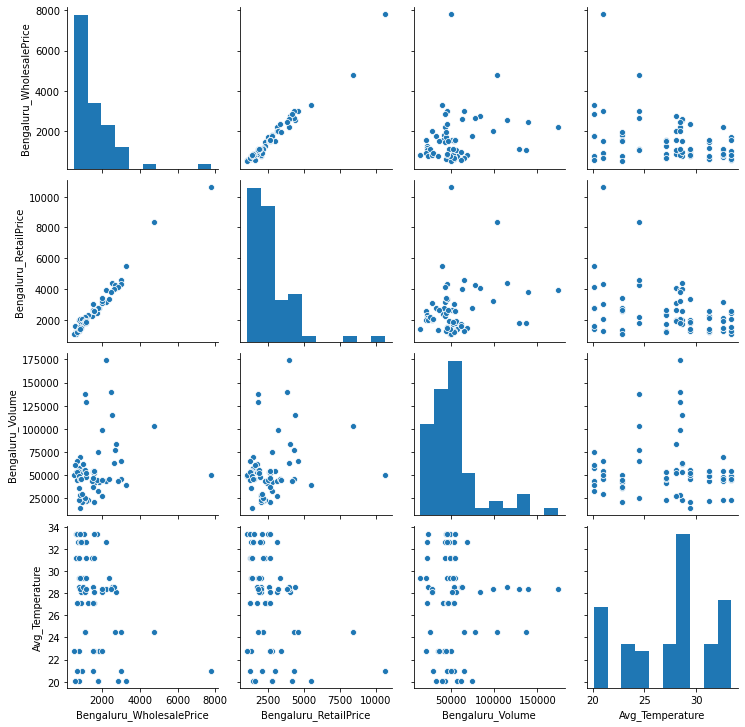

In [ ]:
Ben_data_hist = Ben
sns.pairplot(Ben_data_hist )

# Outlier detection analysis

In [ ]:
col1=['Bengaluru_RetailPrice']
col2=['Bengaluru_WholesalePrice']
col3=['Bengaluru_Volume']
col4=['Avg_Temperature']

# Correlation matrix

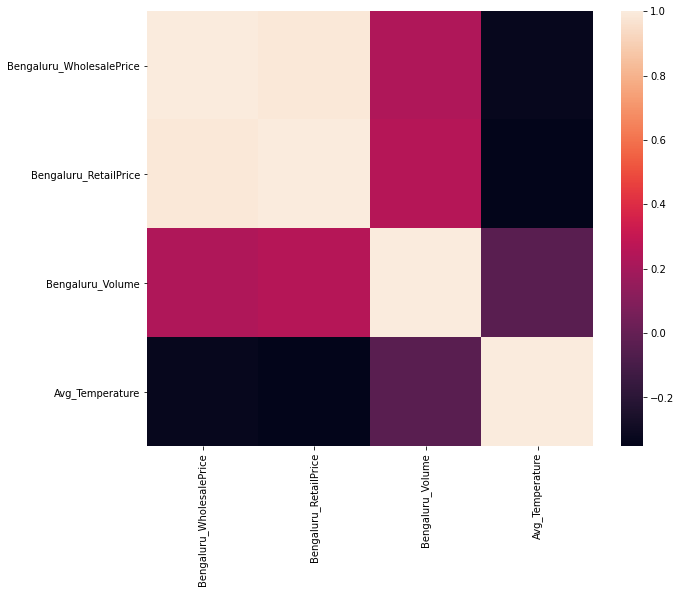

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = Ben.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')

# Analysis using line plots


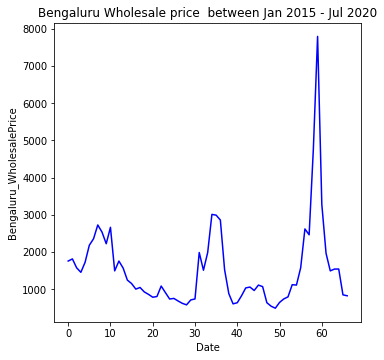

In [ ]:
plt.figure(figsize=(5.5, 5.5))
Ben['Bengaluru_WholesalePrice'].plot(color='b')
plt.title('Bengaluru Wholesale price  between Jan 2015 - Jul 2020')
plt.xlabel('Date')
plt.ylabel('Bengaluru_WholesalePrice')
plt.savefig('B07887_01_14.png', format='png', dpi=300)
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')

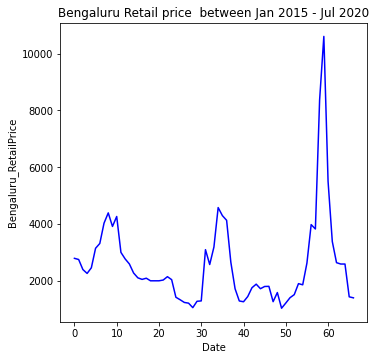

In [ ]:
plt.figure(figsize=(5.5, 5.5))
Ben['Bengaluru_RetailPrice'].plot(color='b')
plt.title('Bengaluru Retail price  between Jan 2015 - Jul 2020')
plt.xlabel('Date')
plt.ylabel('Bengaluru_RetailPrice')
plt.savefig('B07887_01_15.png', format='png', dpi=300)
plt.savefig('plot3.png', dpi=300, bbox_inches='tight')

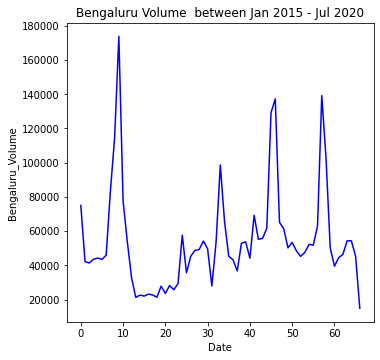

In [ ]:
plt.figure(figsize=(5.5, 5.5))
Ben['Bengaluru_Volume'].plot(color='b')
plt.title('Bengaluru Volume  between Jan 2015 - Jul 2020')
plt.xlabel('Date')
plt.ylabel('Bengaluru_Volume')
plt.savefig('B07887_01_16.png', format='png', dpi=300)
plt.savefig('plot5.png', dpi=300, bbox_inches='tight')

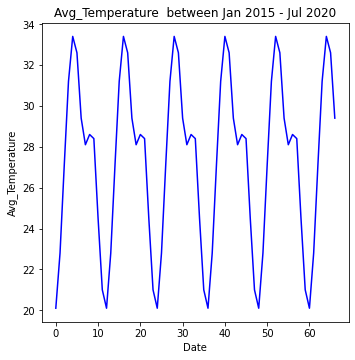

In [ ]:
plt.figure(figsize=(5.5, 5.5))
Ben['Avg_Temperature'].plot(color='b')
plt.title('Avg_Temperature  between Jan 2015 - Jul 2020')
plt.xlabel('Date')
plt.ylabel('Avg_Temperature')
plt.savefig('B07887_01_17.png', format='png', dpi=300)
plt.savefig('plot6.png', dpi=300, bbox_inches='tight')

# Dickey fuller test to check p value and stationality

In [ ]:
#Run ADF test on the original time series
adf_result = stattools.adfuller(Ben['Bengaluru_RetailPrice'], autolag='AIC')

In [ ]:
print('p-val of the ADF test on irregular variations in Retail Price:', adf_result[1])

p-val of the ADF test on irregular variations in Retail Price: 0.005576214349219091


In [ ]:
print('ADF Statistic: %f' % adf_result[0])

ADF Statistic: -3.609811


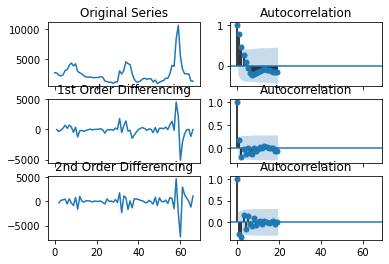

<Figure size 432x288 with 0 Axes>

In [ ]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(Ben.Bengaluru_RetailPrice); axes[0, 0].set_title('Original Series')
plot_acf(Ben.Bengaluru_RetailPrice, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(Ben.Bengaluru_RetailPrice.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(Ben.Bengaluru_RetailPrice.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(Ben.Bengaluru_RetailPrice.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(Ben.Bengaluru_RetailPrice.diff().diff().dropna(), ax=axes[2, 1])

plt.show()
plt.savefig('plot6.png', dpi=300, bbox_inches='tight')

# Box Plot analysis for Outliers

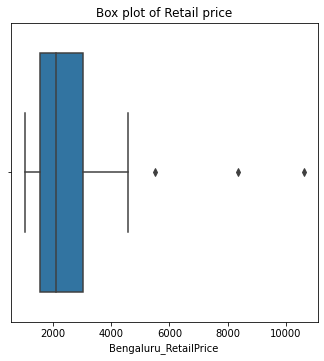

In [ ]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(Ben['Bengaluru_RetailPrice'])
g.set_title('Box plot of Retail price')
plt.savefig('plot7.png', dpi=300, bbox_inches='tight')

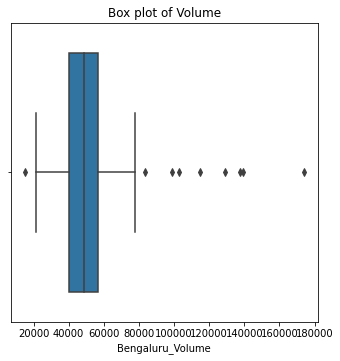

In [ ]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(Ben['Bengaluru_Volume'])
g.set_title('Box plot of Volume')
plt.savefig('plot8.png', dpi=300, bbox_inches='tight')

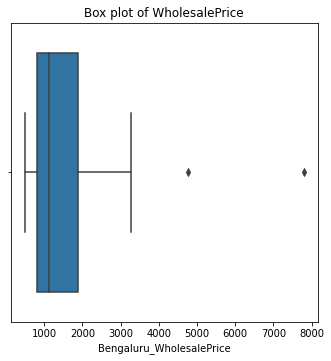

In [ ]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(Ben['Bengaluru_WholesalePrice'])
g.set_title('Box plot of WholesalePrice')
plt.savefig('plot9.png', dpi=300, bbox_inches='tight')

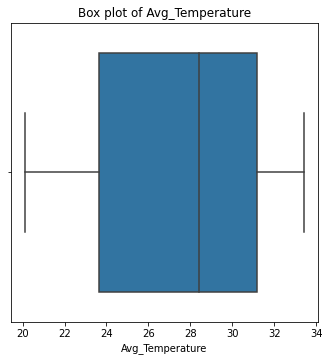

In [ ]:
#Let us draw a box plot to visualize the central tendency and dispersion of PRES
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(Ben['Avg_Temperature'])
g.set_title('Box plot of Avg_Temperature')
plt.savefig('plot10.png', dpi=300, bbox_inches='tight')

There is a linear relationship between Wholesale and retail price from EDA, we decided to drop wholesale price from the final data for Modeling

In [ ]:
col=['Date','Bengaluru_RetailPrice','Bengaluru_Volume','Avg_Temperature']
BenPrice = Ben[col]

In [ ]:
BenPrice.to_excel('Onion_Cleaned.xlsx')

# Auto EDA using SweetViz and Pandas Profiling

In [ ]:
pip install sweetviz

     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
# importing sweetviz
import sweetviz as sv

#analyzing the dataset
advert_report = sv.analyze(BenPrice)
#display the report
advert_report.show_html('BengaluruOnion.html')

:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report BengaluruOnion.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [ ]:
pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 2.8MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 3.1MB 9.0MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 604kB 45.7MB/s 
     |████████████████████████████████| 296kB 35.9MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=a4103da8eb3b89e15c4086b96a7d7cfab30a9e071e3e922a3ffac8b10c981289
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=1641bea4cf36fe72774111e42c7a613d046b35e8acf90779700ba280f080334a
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: pandas-profiling 1.4.1
    Uninstalling pandas-profiling-1.4.1:
      Suc

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(BenPrice)

display(profile)

In [ ]:
profile.to_file("BengaluruOnionEDA.html")